## Análisis EDA: Items Tender

### 1. Carga de datos

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

#### Leyendo el dataset, convirtiéndolo a parquet y mostrando los primeros rows

In [2]:
items_df = pd.read_csv('../../data/Processed/csv_files/tender_items_sesna_data.csv')
items_df.to_parquet('../../data/Processed/parquet_files/tender_items_sesna_data.parquet')

In [19]:
items_df = pd.read_parquet('../../data/Processed/parquet_files/tender_items_sesna_data.parquet')

In [20]:
items_df.shape

(11419377, 7)

### 2. Análisis del problema

#### 2.1 Estructura de los datos

In [21]:
items_df.head()

,cve_expediente,items_unit_name_tender,items_class_id_tender,items_class_description_tender,items_quantity_tender,items_id_tender,items_description_tender
0,2241924,Servicio,35500005,Mantenimiento y conservacion de vehiculos terr...,1.0,14297483,EN ESTE APARTADO SE DEBERÁ REGISTRAR EL GRAN T...
1,2241924,Servicio,35500005,Mantenimiento y conservacion de vehiculos terr...,1.0,14297484,EN ESTE APARTADO SE DEBERÁ REGISTRAR EL GRAN T...
2,2270459,Servicio,33900012,Servicios integrales,1.0,14276741,Servicio integral para el mantenimiento de las...
3,2273440,Servicio,32400001,Alquiler de equipo e instrumental de laboratorio,1.0,14287751,Arrendamiento de Ultrasonido con Doppler Color
4,2279112,Servicio,35200003,Mobiliario y equipo de administracion (manteni...,1.0,14074981,SERVICIO DE MANTENIMIENTO PREVENTIVO A EQUIPOS...


In [22]:
items_df.tail()

,cve_expediente,items_unit_name_tender,items_class_id_tender,items_class_description_tender,items_quantity_tender,items_id_tender,items_description_tender
11419372,2571516,Servicio,33900001,Estudios e investigaciones,1.0,16384466,PRECIO TOTAL DEL POZO (PT4)Pozo ENE-3 descrito...
11419373,2571516,Servicio,33900001,Estudios e investigaciones,1.0,16384463,PRECIO TOTAL DEL POZO (PT3)Pozo ENE-2 descrito...
11419374,2571516,Servicio,33900001,Estudios e investigaciones,1.0,16384460,PRECIO TOTAL DEL POZO (PT1)Pozo ECP-1 (435D) d...
11419375,2571516,Servicio,33900001,Estudios e investigaciones,1.0,16384464,PRECIO TOTAL DEL POZO (PT5)Pozo ESM-1 descrito...
11419376,2571516,Servicio,33900001,Estudios e investigaciones,1.0,16384461,PRECIO TOTAL DEL POZO (PT2)Pozo ECP-2 (449D) d...


#### 2.2 Información General

In [23]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11419377 entries, 0 to 11419376
Data columns (total 7 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   cve_expediente                  int64  
 1   items_unit_name_tender          object 
 2   items_class_id_tender           int64  
 3   items_class_description_tender  object 
 4   items_quantity_tender           float64
 5   items_id_tender                 int64  
 6   items_description_tender        object 
dtypes: float64(1), int64(3), object(3)
memory usage: 609.9+ MB


In [24]:
items_df = items_df.astype({
    'cve_expediente': 'string',
    'items_class_id_tender': 'string',
    'items_id_tender': 'string'
})

#### 2.3 Estadísticas descriptivas

In [25]:
# Obtener estadísticas descriptivas para todas las variables
descriptive_stats = items_df.describe(include='all').transpose()

# Mostrar las estadísticas descriptivas
descriptive_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cve_expediente,11419377,123465,2369500,53832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
items_unit_name_tender,11419377,176,Pieza,4810485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
items_class_id_tender,11419377,10534,35400003,319903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
items_class_description_tender,11419377,10308,Servicios de mantenimiento de equipo e instrum...,319903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
items_quantity_tender,11419377.0,NaN,NaN,NaN,2376110669.468726,989002363707.306396,-20.0,1.0,10.0,100.0,431666666666667.0
items_id_tender,11419377,2170620,14297483,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
items_description_tender,11419366,1073753,CONFORME A CONVOCATORIA,11180,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
items_df.describe()

,items_quantity_tender
count,1.141938e+07
mean,2.376111e+09
std,9.890024e+11
min,-2.000000e+01
25%,1.000000e+00
50%,1.000000e+01
75%,1.000000e+02
max,4.316667e+14


### 3. Análisis Univariado

#### 3.1 Variables Numéricas

items_quantity_tender

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


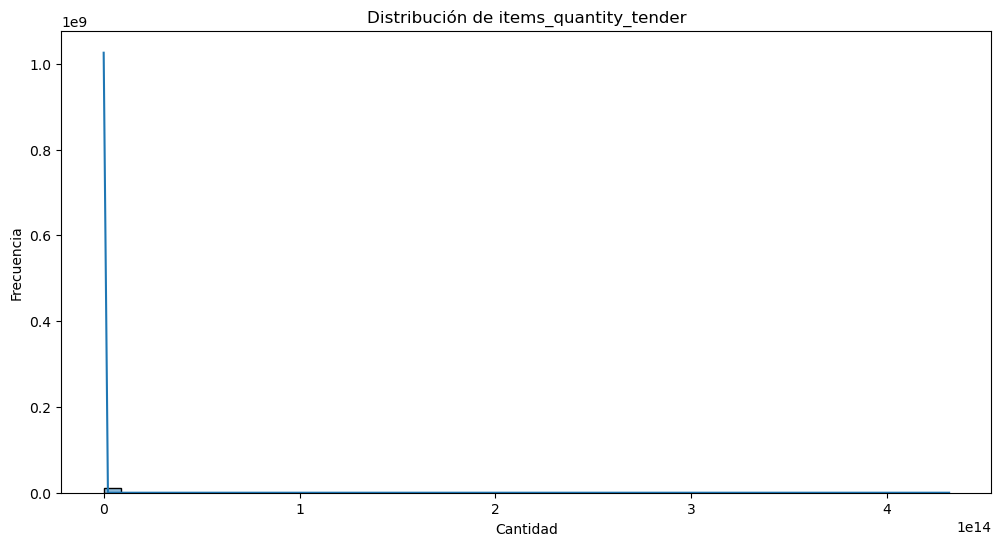

In [27]:
# 5. Análisis de la variable 'items_quantity_tender'
plt.figure(figsize=(12, 6))
sns.histplot(items_df['items_quantity_tender'], bins=50, kde=True)
plt.title('Distribución de items_quantity_tender')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

### 3.2 Variables Categóricas

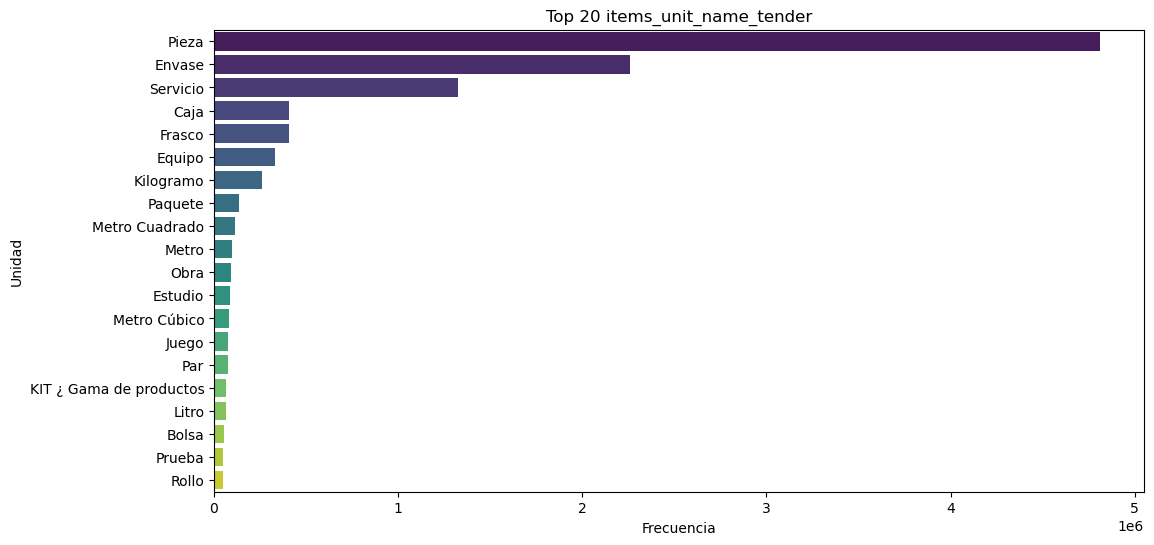

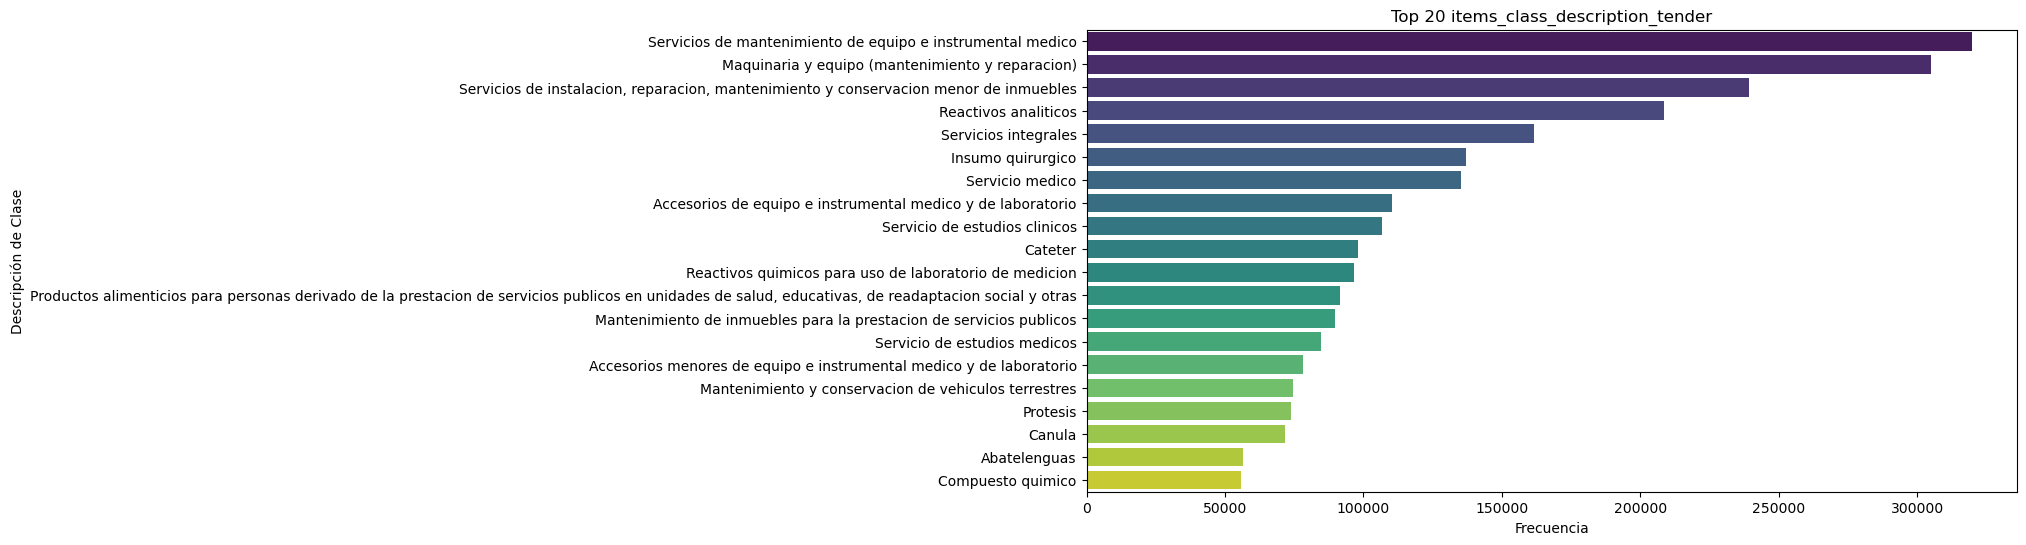

In [28]:
plt.figure(figsize=(12, 6))
top_20_items_unit = items_df['items_unit_name_tender'].value_counts().nlargest(20).index
sns.countplot(y='items_unit_name_tender', data=items_df, order=top_20_items_unit, palette="viridis")
plt.title('Top 20 items_unit_name_tender')
plt.xlabel('Frecuencia')
plt.ylabel('Unidad')
plt.show()

# Generar histograma para 'items_class_description_tender' limitado al top 20
plt.figure(figsize=(12, 6))
top_20_items_class = items_df['items_class_description_tender'].value_counts().nlargest(20).index
sns.countplot(y='items_class_description_tender', data=items_df, order=top_20_items_class, palette="viridis")
plt.title('Top 20 items_class_description_tender')
plt.xlabel('Frecuencia')
plt.ylabel('Descripción de Clase')
plt.show()

### 5. Detección de Outliers

#### 5.1 IQR (Rango intercuartil)

In [29]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [30]:
# Detecting outliers in number_tenderers
outliers_items_quantity_tender = detect_outliers(items_df, 'items_quantity_tender')
print(f"Outliers in 'items_quantity_tender': {len(outliers_items_quantity_tender)}")

Outliers in 'items_quantity_tender': 2014422


#### 5.2 Box Plots

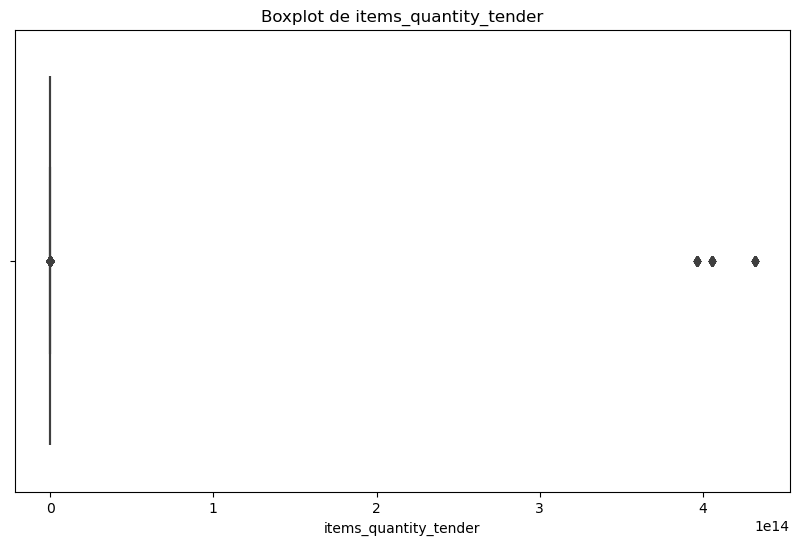

In [31]:
# Boxplot for number_tenderers
plt.figure(figsize=(10, 6))
sns.boxplot(x=items_df['items_quantity_tender'])
plt.title('Boxplot de items_quantity_tender')
plt.show()

### 6. Análisis Multivariado

#### 6.1 Distribución de cantidades adquiridas por clase

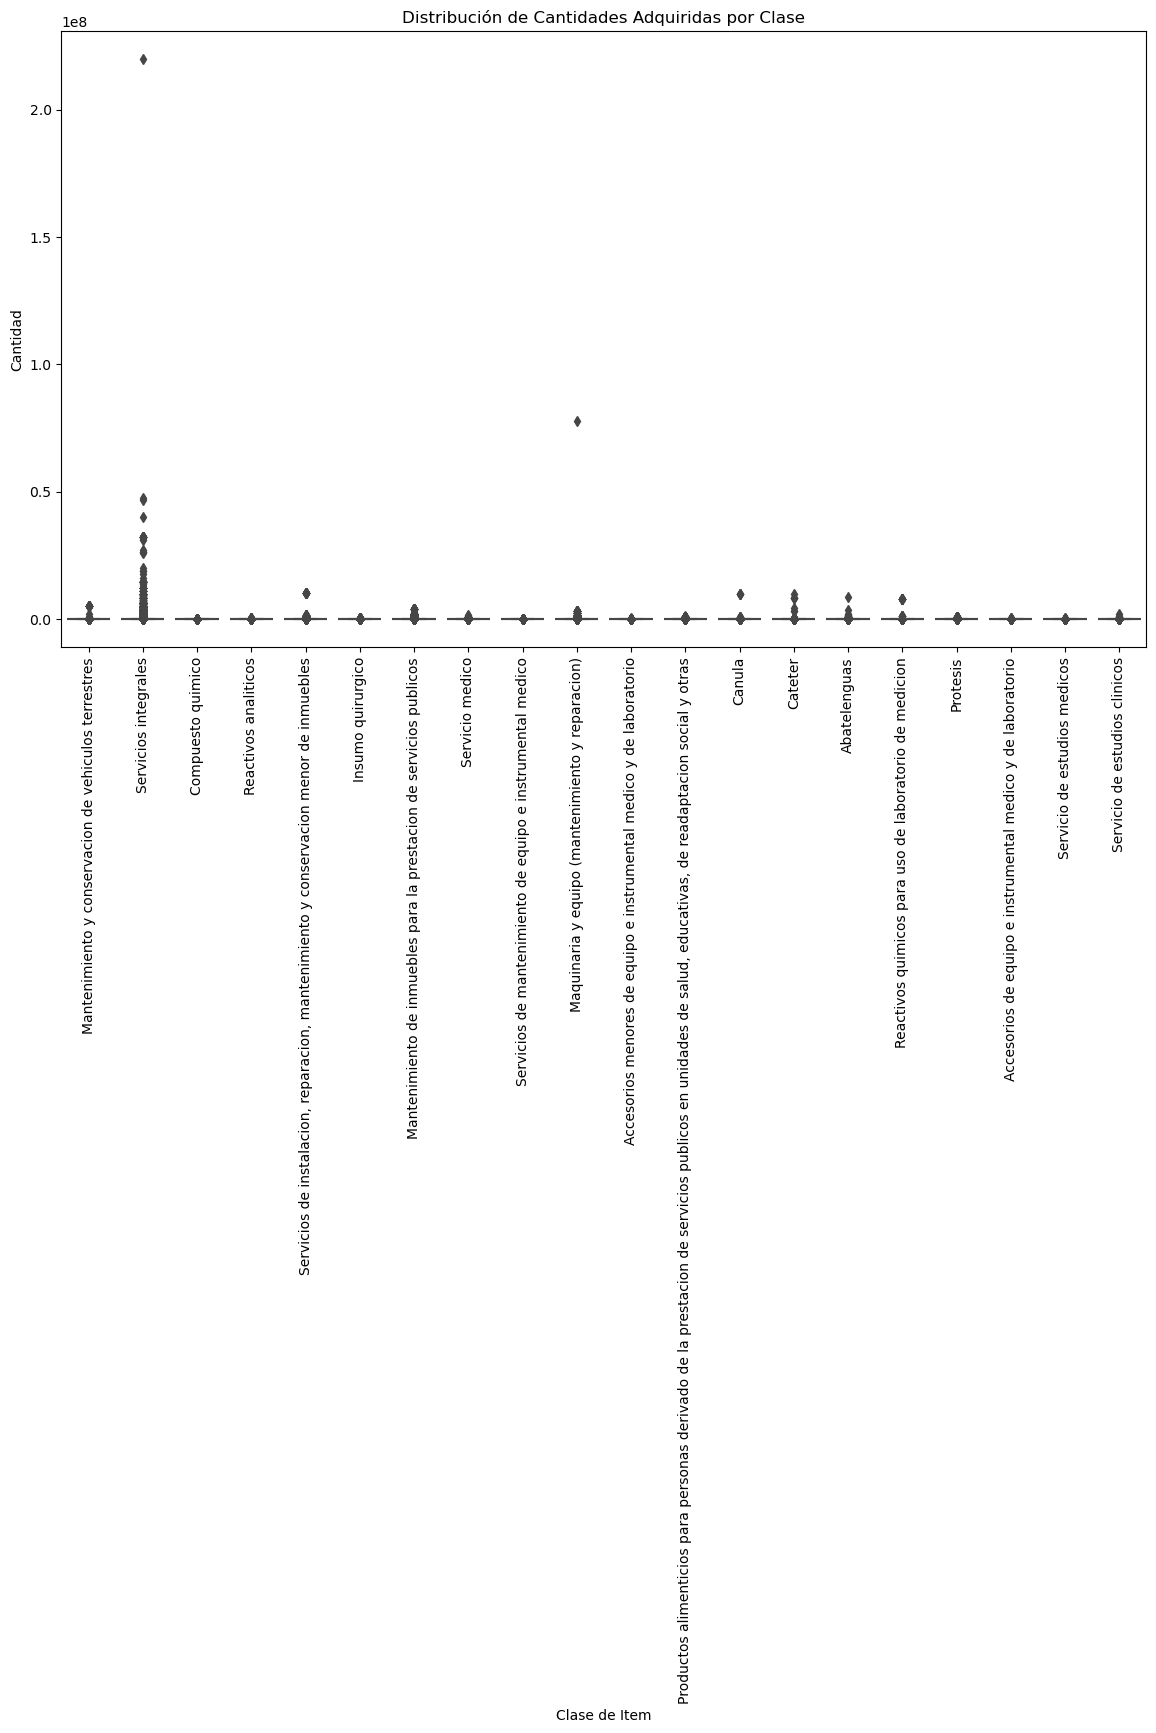

In [33]:
import seaborn as sns

# Filtrar top 20 clases más comunes para una visualización clara
top_classes = items_df['items_class_description_tender'].value_counts().head(20).index
filtered_df = items_df[items_df['items_class_description_tender'].isin(top_classes)]

# Plotear un boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='items_class_description_tender', y='items_quantity_tender', data=filtered_df)
plt.xlabel('Clase de Item')
plt.ylabel('Cantidad')
plt.title('Distribución de Cantidades Adquiridas por Clase')
plt.xticks(rotation=90)
plt.show()


### 7. Preguntas de Negocio

#### 7.1 ¿Cuáles son las unidades de medida más comunes?

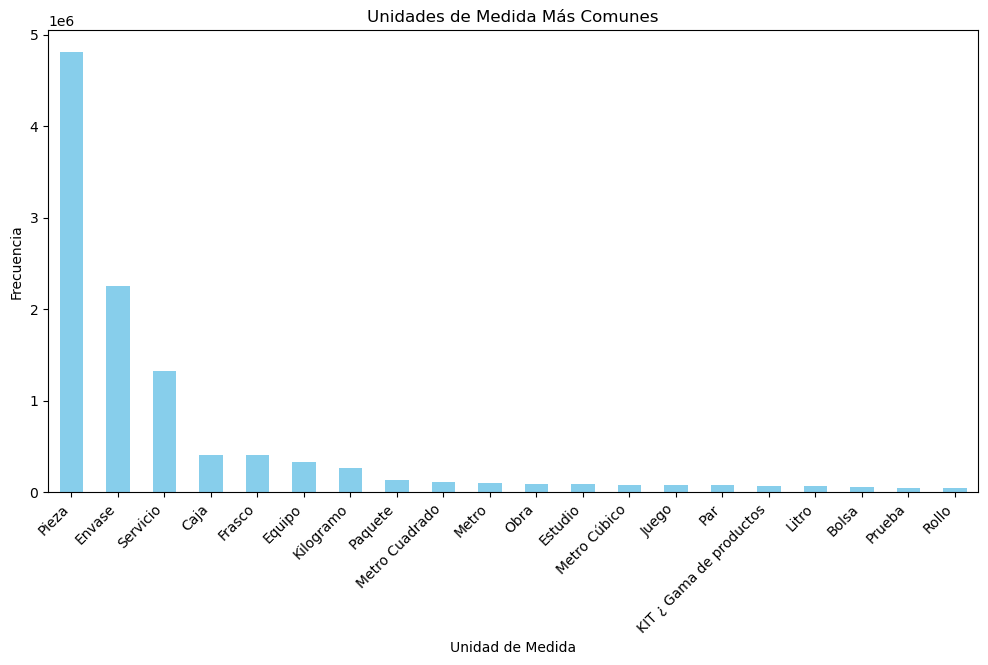

In [32]:
# Contar la frecuencia de cada unidad de medida
unit_counts = items_df['items_unit_name_tender'].value_counts().head(20)

# Plotear un histograma
plt.figure(figsize=(12, 6))
unit_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Unidad de Medida')
plt.ylabel('Frecuencia')
plt.title('Unidades de Medida Más Comunes')
plt.xticks(rotation=45, ha='right')
plt.show()


#### 7.2 ¿Cuáles son las clases de items más comunes?

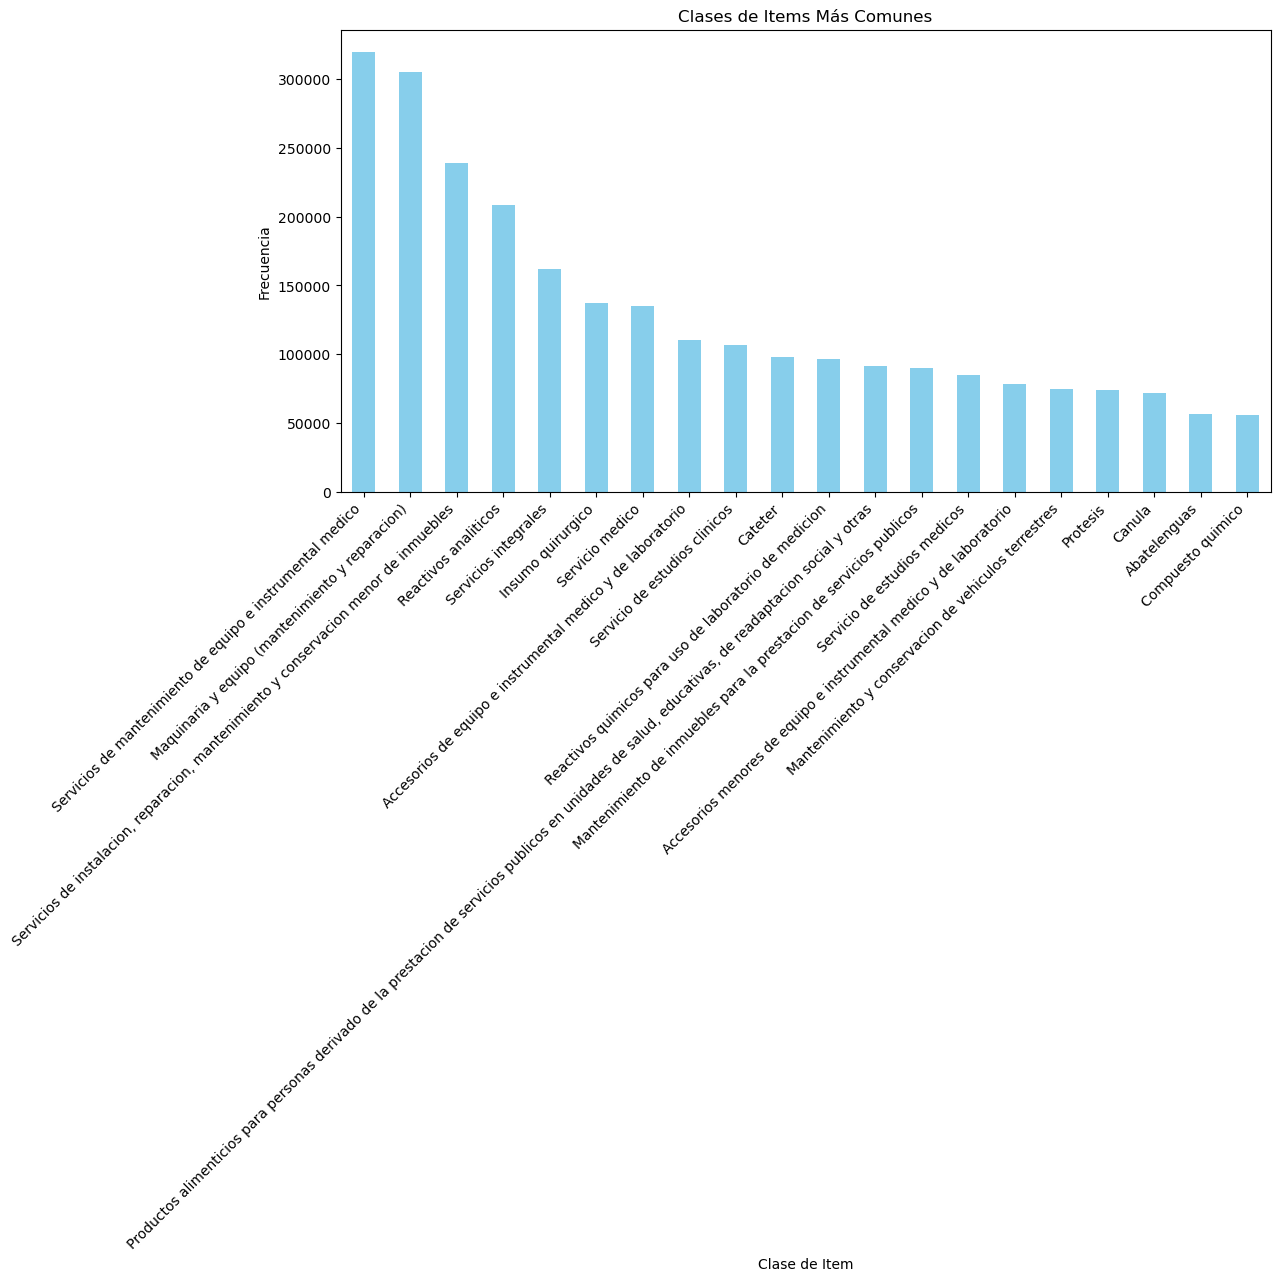

In [34]:
# Contar la frecuencia de cada clase de item
class_counts = items_df['items_class_description_tender'].value_counts().head(20)

# Plotear un histograma
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Clase de Item')
plt.ylabel('Frecuencia')
plt.title('Clases de Items Más Comunes')
plt.xticks(rotation=45, ha='right')
plt.show()


#### 7.4 ¿Cuál es la cantidad promedio de items por expediente?

In [36]:
# Calcular la cantidad de items por expediente
items_per_expediente = items_df.groupby('cve_expediente').size()

# Calcular la cantidad promedio de items por expediente
average_items_per_expediente = items_per_expediente.mean()

print(f'Cantidad promedio de items por expediente: {average_items_per_expediente:.2f}')

Cantidad promedio de items por expediente: 92.49
